# 13.6 目标检测数据集
- **目录**
  - 13.6.1 下载目标检测数据集
  - 13.6.2 读取目标检测数据集
  - 13.6.3 目标检测数据集演示

- 目标检测领域没有像MNIST和Fashion-MNIST那样的小数据集。 
- 为了快速测试目标检测模型，我们收集并标记了一个小型数据集。 
  - 首先拍摄了一组香蕉的照片，并生成了1000张不同角度和大小的香蕉图像。 
  - 然后在一些背景图片的随机位置上放一张香蕉的图像。 
  - 最后在图片上为这些香蕉标记了边界框。
## 13.6.1 下载目标检测数据集
- 包含所有图像和CSV标签文件的香蕉检测数据集可以直接从互联网下载。

In [1]:
%matplotlib inline
import os
import pandas as pd
import torch
import torchvision
from d2l import torch as d2l

#@save
d2l.DATA_HUB['banana-detection'] = (
    d2l.DATA_URL + 'banana-detection.zip',
    '5de26c8fce5ccdea9f91267273464dc968d20d72')

## 13.6.2 读取目标检测数据集
- 通过`read_data_bananas`函数读取香蕉检测数据集。 
- 该数据集包括一个的CSV文件，内含目标类别标签和位于左上角和右下角的真实边界框坐标。

In [2]:
#@save
def read_data_bananas(is_train=True):
    """读取香蕉检测数据集中的图像和标签"""
    data_dir = d2l.download_extract('banana-detection')
    csv_fname = os.path.join(data_dir, 'bananas_train' if is_train
                             else 'bananas_val', 'label.csv')
    csv_data = pd.read_csv(csv_fname)
    csv_data = csv_data.set_index('img_name')
    images, targets = [], []
    ## iterrows按行迭代数据
    for img_name, target in csv_data.iterrows():
        images.append(torchvision.io.read_image(
            os.path.join(data_dir, 'bananas_train' if is_train else
                         'bananas_val', 'images', f'{img_name}')))
        # 这里的target包含（类别，左上角x，左上角y，右下角x，右下角y），
        # 其中所有图像都具有相同的香蕉类（索引为0）
        targets.append(list(target))
    return images, torch.tensor(targets).unsqueeze(1) / 256

----
- **说明：read_data_bananas函数代码功能详解**

In [3]:
## 数据格式
data_dir = d2l.download_extract('banana-detection')
csv_fname = os.path.join(data_dir, 'bananas_train' if True
                             else 'bananas_val', 'label.csv')
csv_data = pd.read_csv(csv_fname)
csv_data

,img_name,label,xmin,ymin,xmax,ymax
0,0.png,0,104,20,143,58
1,1.png,0,68,175,118,223
2,2.png,0,163,173,218,239
3,3.png,0,48,157,84,201
4,4.png,0,32,34,90,86
...,...,...,...,...,...,...
995,995.png,0,171,101,214,147
996,996.png,0,42,57,83,96
997,997.png,0,47,54,86,109
998,998.png,0,43,125,90,166


In [4]:
csv_data.shape

(1000, 6)

In [5]:
## 设置索引后数据的形状
csv_data = csv_data.set_index('img_name')
csv_data

,label,xmin,ymin,xmax,ymax
img_name,,,,,
0.png,0,104,20,143,58
1.png,0,68,175,118,223
2.png,0,163,173,218,239
3.png,0,48,157,84,201
4.png,0,32,34,90,86
...,...,...,...,...,...
995.png,0,171,101,214,147
996.png,0,42,57,83,96
997.png,0,47,54,86,109


In [6]:
csv_data.shape

(1000, 5)

In [7]:
csv_data.index

Index(['0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png',
       '8.png', '9.png',
       ...
       '990.png', '991.png', '992.png', '993.png', '994.png', '995.png',
       '996.png', '997.png', '998.png', '999.png'],
      dtype='object', name='img_name', length=1000)

In [8]:
## 通过列名获取数据
csv_data['label']

img_name
0.png      0
1.png      0
2.png      0
3.png      0
4.png      0
          ..
995.png    0
996.png    0
997.png    0
998.png    0
999.png    0
Name: label, Length: 1000, dtype: int64

In [9]:
for img_name, target in csv_data.iterrows():
    print(img_name,': \n', target)
    break

0.png : 
 label      0
xmin     104
ymin      20
xmax     143
ymax      58
Name: 0.png, dtype: int64


In [10]:
images, targets = [], []
for img_name, target in csv_data.iterrows():
        images.append(torchvision.io.read_image(
            os.path.join(data_dir, 'bananas_train' if True else
                         'bananas_val', 'images', f'{img_name}')))
        # 这里的target包含（类别，左上角x，左上角y，右下角x，右下角y），
        # 其中所有图像都具有相同的香蕉类（索引为0）
        targets.append(list(target))
targets[:10]

[[0, 104, 20, 143, 58],
 [0, 68, 175, 118, 223],
 [0, 163, 173, 218, 239],
 [0, 48, 157, 84, 201],
 [0, 32, 34, 90, 86],
 [0, 69, 201, 120, 245],
 [0, 167, 99, 212, 135],
 [0, 157, 67, 197, 108],
 [0, 131, 157, 189, 219],
 [0, 163, 93, 217, 158]]

In [11]:
images[:1],images[0].shape

([tensor([[[217, 223, 220,  ...,  28,  15,  28],
           [206, 207, 215,  ...,  41,  18,  29],
           [191, 197, 210,  ...,  54,  28,  18],
           ...,
           [205, 211, 207,  ...,  44,  50,  75],
           [201, 202, 203,  ...,  50,  55,  69],
           [198, 195, 198,  ...,  55,  59,  68]],
  
          [[214, 220, 219,  ...,  23,  10,  23],
           [203, 207, 214,  ...,  36,  13,  24],
           [191, 197, 210,  ...,  46,  23,  13],
           ...,
           [202, 208, 204,  ...,  45,  52,  77],
           [197, 199, 200,  ...,  52,  57,  72],
           [194, 191, 195,  ...,  57,  61,  71]],
  
          [[241, 249, 250,  ...,  19,   4,  17],
           [230, 233, 245,  ...,  32,   7,  18],
           [215, 223, 238,  ...,  43,  17,   7],
           ...,
           [221, 225, 221,  ...,  37,  39,  63],
           [214, 216, 217,  ...,  41,  43,  55],
           [209, 206, 212,  ...,  46,  47,  54]]], dtype=torch.uint8)],
 torch.Size([3, 256, 256]))

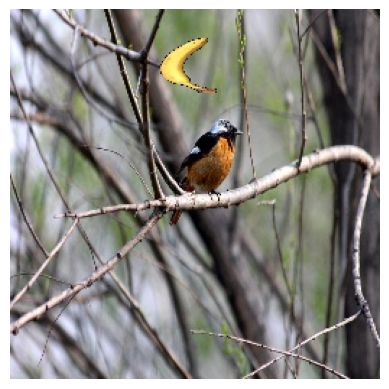

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 假设有一个PyTorch图像张量（形状为 [C, H, W]）
# 这里生成一个随机的RGB图像作为示例

# 步骤1：将PyTorch张量转换为NumPy数组
image_np = images[0].numpy()

# 步骤2：调整通道顺序，从 (C, H, W) 转换为 (H, W, C)
image_np = np.transpose(image_np, (1, 2, 0))



# 步骤43：使用Matplotlib显示图像
plt.imshow(image_np)
plt.axis('off')  # 关闭坐标轴
plt.show()

-----------

- 使用`read_data_bananas`函数读取图像和标签。
- 以下`BananasDataset`类别将允许创建一个自定义`Dataset`实例来加载香蕉检测数据集。

In [13]:
#@save
class BananasDataset(torch.utils.data.Dataset):
    """一个用于加载香蕉检测数据集的自定义数据集"""
    def __init__(self, is_train):
        self.features, self.labels = read_data_bananas(is_train)
        print('read ' + str(len(self.features)) + (f' training examples' if
              is_train else f' validation examples'))

    def __getitem__(self, idx):
        return (self.features[idx].float(), self.labels[idx])

    def __len__(self):
        return len(self.features)

- 最后定义`load_data_bananas`函数，来**为训练集和测试集返回两个数据加载器实例**。
- 对于测试集，无须按随机顺序读取它。


In [14]:
#@save
def load_data_bananas(batch_size):
    """加载香蕉检测数据集"""
    train_iter = torch.utils.data.DataLoader(BananasDataset(is_train=True),
                                             batch_size, shuffle=True)
    val_iter = torch.utils.data.DataLoader(BananasDataset(is_train=False),
                                           batch_size)
    return train_iter, val_iter

- 先**读取一个小批量，并打印其中的图像和标签的形状**。
  - 图像的小批量的形状为（批量大小、通道数、高度、宽度），看起来很眼熟：它与我们之前图像分类任务中的相同。
  - 标签的小批量的形状为（批量大小，$m$，5），其中$m$是数据集的任何图像中边界框可能出现的最大数量。
- 小批量计算虽然高效，但它要求每张图像含有相同数量的边界框，以便放在同一个批量中。
- 通常来说，图像可能拥有不同数量个边界框；因此，在达到$m$之前，边界框少于$m$的图像将被非法边界框填充。
- 这样，每个边界框的标签将被长度为5的数组表示。
- 数组中的第一个元素是边界框中对象的类别，其中-1表示用于填充的非法边界框。
- 数组的其余四个元素是边界框左上角和右下角的（$x$，$y$）坐标值（值域在0到1之间）。
- 对于香蕉数据集而言，由于每张图像上只有一个边界框，因此$m=1$。


In [15]:
batch_size, edge_size = 32, 256
train_iter, _ = load_data_bananas(batch_size)
batch = next(iter(train_iter))
batch[0].shape, batch[1].shape

read 1000 training examples
read 100 validation examples


(torch.Size([32, 3, 256, 256]), torch.Size([32, 1, 5]))

## 13.6.3 目标检测数据集演示
- 展示10幅带有真实边界框的图像。
- 可以看到在所有这些图像中香蕉的旋转角度、大小和位置都有所不同。
- 当然，这只是一个简单的人工数据集，实践中真实世界的数据集通常要复杂得多。


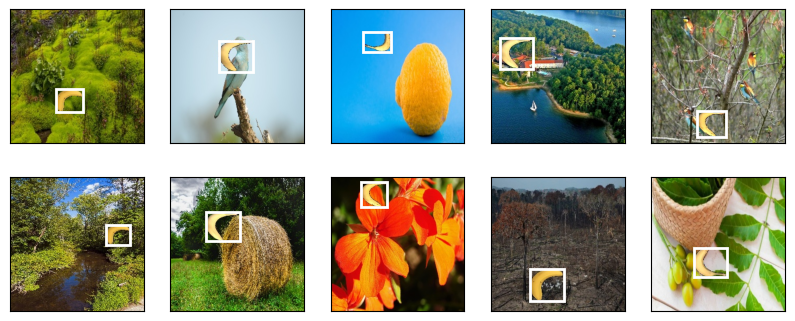

In [16]:
## 将通道层轮排到最后一轴
imgs = (batch[0][0:10].permute(0, 2, 3, 1)) / 255
axes = d2l.show_images(imgs, 2, 5, scale=2)
for ax, label in zip(axes, batch[1][0:10]):
    d2l.show_bboxes(ax, [label[0][1:5] * edge_size], colors=['w'])

In [18]:
imgs

tensor([[[[0.3647, 0.3333, 0.1412],
          [0.4196, 0.3961, 0.2078],
          [0.4078, 0.3922, 0.2157],
          ...,
          [0.2078, 0.2039, 0.0000],
          [0.2902, 0.2627, 0.0824],
          [0.2549, 0.2235, 0.0706]],

         [[0.3451, 0.3176, 0.1059],
          [0.4353, 0.4078, 0.2039],
          [0.4510, 0.4353, 0.2471],
          ...,
          [0.2157, 0.2078, 0.0000],
          [0.3059, 0.2824, 0.0863],
          [0.2000, 0.1725, 0.0000]],

         [[0.3059, 0.2745, 0.0275],
          [0.3098, 0.2863, 0.0431],
          [0.3961, 0.3765, 0.1569],
          ...,
          [0.1725, 0.1569, 0.0000],
          [0.2196, 0.1922, 0.0000],
          [0.2392, 0.2078, 0.0157]],

         ...,

         [[0.5176, 0.5725, 0.0431],
          [0.5059, 0.5608, 0.0235],
          [0.5843, 0.6431, 0.0902],
          ...,
          [0.2863, 0.2863, 0.0510],
          [0.1882, 0.1725, 0.0000],
          [0.1686, 0.1490, 0.0000]],

         [[0.5843, 0.6431, 0.0431],
          [0.5843

## 小结

* 我们收集的香蕉检测数据集可用于演示目标检测模型。
* 用于目标检测的数据加载与图像分类的数据加载类似。但是，在目标检测中，标签还包含真实边界框的信息，它不出现在图像分类中。